In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
DATA_FOLDER = '../DATA'
files = os.listdir(DATA_FOLDER)
sds_files = [i for i in files if 'sds011' in i]
bme_files = [i for i in files if 'bme280' in i]
dht_files = [i for i in files if 'dht22' in i]

In [3]:
data = pd.read_csv(os.path.join(
    DATA_FOLDER, '26717_bme280_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)
data.head()

,sensor_id,sensor_type,location,lat,lon,pressure,altitude,pressure_sealevel,temperature,humidity
timestamp,,,,,,,,,,
2019-05-27 18:12:41,26717,BME280,14325,55.684,37.584,99031.29,NaN,NaN,18.46,43.94
2019-05-27 18:15:22,26717,BME280,14325,55.684,37.584,99037.25,NaN,NaN,18.39,44.21
2019-05-27 18:17:56,26717,BME280,14325,55.684,37.584,99032.41,NaN,NaN,18.33,44.31
2019-05-27 18:20:30,26717,BME280,14325,55.684,37.584,99032.87,NaN,NaN,18.35,44.31
2019-05-27 18:23:03,26717,BME280,14325,55.684,37.584,99031.01,NaN,NaN,18.33,44.49


In [4]:
sensors_data =[]

In [5]:
idx = pd.date_range('2019-04-01', '2019-12-05', freq='5T')

In [6]:
sds_data = pd.DataFrame(idx, columns=['date'])
sds_data = sds_data.set_index('date')

In [7]:
bme_data = pd.DataFrame(idx, columns=['date'])
bme_data = bme_data.set_index('date')

In [8]:
from pandas.errors import EmptyDataError
for f in bme_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['pressure'] = data.pressure.replace('unavailable', None)
        data['temperature'] = data.temperature.replace('unavailable', None)
        data['humidity'] = data.humidity.replace('unavailable', None)
        data['pressure'] = data.pressure.astype(float)
        data['temperature'] = data.temperature.astype(float)
        data['humidity'] = data.humidity.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        bme_data['pressure_'+str(s_id)] = new_data.pressure
        bme_data['temperature_'+str(s_id)] = new_data.temperature
        bme_data['humidity_'+str(s_id)] = new_data.humidity
    except EmptyDataError:
        pass

In [9]:
from pandas.errors import EmptyDataError
for f in sds_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['P1'] = data.P1.replace('unavailable', None)
        data['P2'] = data.P2.replace('unavailable', None)
        data['P1'] = data.P1.astype(float)
        data['P2'] = data.P2.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        sds_data['P1_'+str(s_id)] = new_data.P1
        sds_data['P2_'+str(s_id)] = new_data.P2
    except EmptyDataError:
        pass

/home/anatoly/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
sensors = pd.DataFrame(sensors_data, columns=['sensor_id', 'sensor_type', 'lat', 'lon'])

In [11]:
bme_data.head()

,pressure_26717,temperature_26717,humidity_26717,pressure_32440,temperature_32440,humidity_32440,pressure_35435,temperature_35435,humidity_35435,pressure_32710,...,humidity_35443,pressure_32338,temperature_32338,humidity_32338,pressure_30732,temperature_30732,humidity_30732,pressure_34670,temperature_34670,humidity_34670
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
p1_col = [i for i in sds_data.columns if 'P1_' in i]
p2_col = [i for i in sds_data.columns if 'P2_' in i]

In [13]:
temp_col = [i for i in bme_data.columns if 'temperature_' in i]
pres_col = [i for i in bme_data.columns if 'pressure_' in i]
hum_col = [i for i in bme_data.columns if 'humidity_' in i]

In [14]:
avg_data = pd.DataFrame(idx, columns=['date'])
avg_data = avg_data.set_index('date')

In [20]:
avg_data['P1'] = sds_data[p1_col].mean(axis = 1, skipna = True)
avg_data['P2'] = sds_data[p2_col].mean(axis = 1, skipna = True)
avg_data['pressure'] = bme_data[pres_col].mean(axis = 1, skipna = True)
avg_data['temperature'] = bme_data[temp_col].mean(axis = 1, skipna = True)
avg_data['humidity'] = bme_data[hum_col].mean(axis = 1, skipna = True)
avg_data['P1_std'] = sds_data[p1_col].std(axis = 1, skipna = True)
avg_data['P2_std'] = sds_data[p2_col].std(axis = 1, skipna = True)
avg_data['pressure_std'] = bme_data[pres_col].std(axis = 1, skipna = True)
avg_data['temperature_std'] = bme_data[temp_col].std(axis = 1, skipna = True)
avg_data['humidity_std'] = bme_data[hum_col].std(axis = 1, skipna = True)

In [78]:
p1 = avg_data.P1.loc['2019-11-25':'2019-12-08']

In [79]:
p1 = p1.interpolate()

In [80]:
p1 = p1.rolling(4, min_periods=1).mean()

In [81]:
p1.head()

date
2019-11-25 00:00:00    14.894350
2019-11-25 00:05:00    14.548337
2019-11-25 00:10:00    16.517150
2019-11-25 00:15:00    14.545430
2019-11-25 00:20:00    14.952754
Name: P1, dtype: float64

In [82]:
freq = round(60*25/5) # 1 day
decomp = sm.tsa.seasonal_decompose(p1, model='additive', freq=freq)

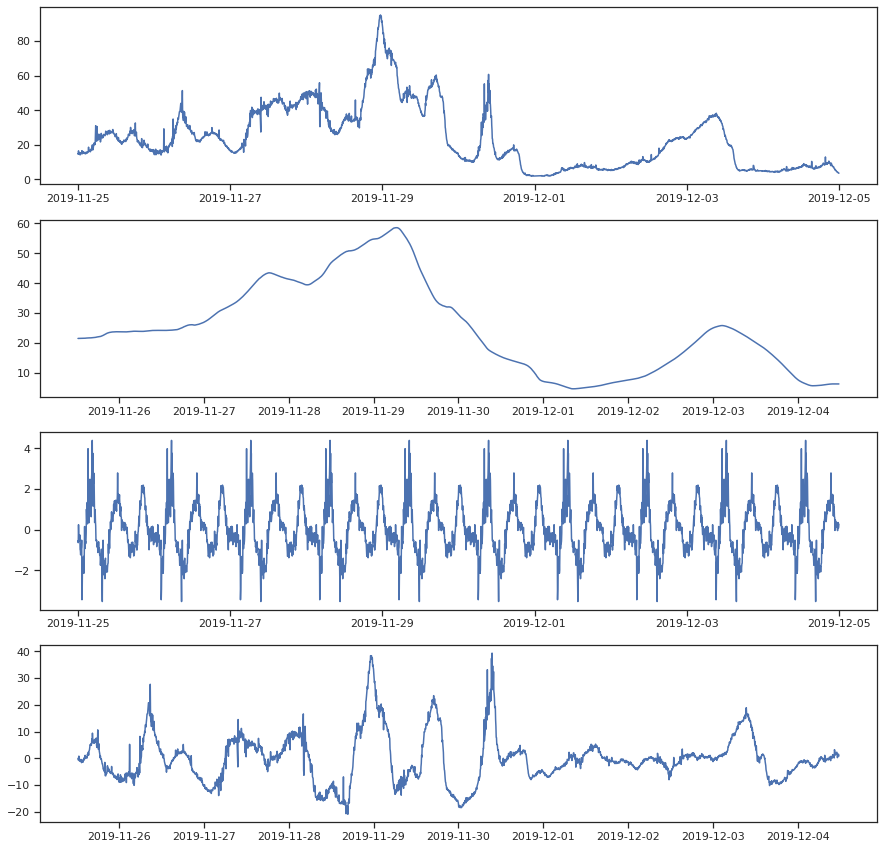

In [87]:
f, axs = plt.subplots(4,1,figsize=(15,15))
axs[0].plot(decomp.observed)
axs[1].plot(decomp.trend)
axs[2].plot(decomp.seasonal)
axs[3].plot(decomp.resid)

In [128]:
decomp.resid.mean(), decomp.resid.median(), decomp.resid.std()

(-0.04580005402657026, -0.548778386731161, 8.99705073668314)

In [147]:
d = avg_data.P1
#d = d [::-1]

In [148]:
# split dataframe
weeks = [g for n, g in d.groupby(pd.Grouper(freq='7D'))]

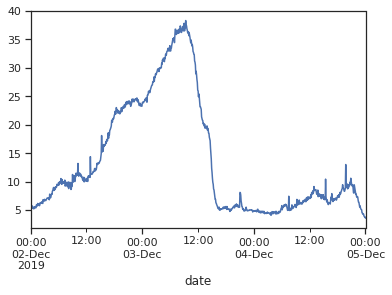

In [149]:
weeks[-1].plot()

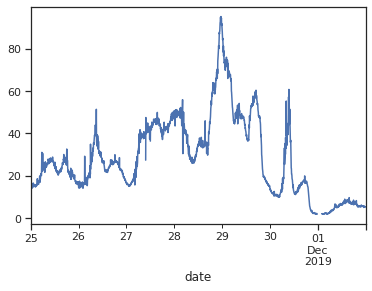

In [150]:
weeks[len(weeks)-2].plot()